In [ ]:
This notebook contains some initial exporation of the features and fan control.

It was created when I was still logging the feature data in the log file.

It was also created before I realized that I could set the power budget of the CPU.

The 'Explore the data' notebook looks at the current parquet feature logs and so
is a better starting point for understanding the data.

I do some data processing here though which may prove useful elsewhere.

For great example of dealing with time based data in pandas see this medium post:
https://medium.com/@alexander.mueller/rolling-aggregations-on-time-series-data-with-pandas-80dee5893f9

In [1]:
#!pip install pandarellel

In [2]:
#!pip install scipy

In [3]:
#!pip install seaborn

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from pandarallel import pandarallel

I'm impatient so I want to use my CPU's when I can :)

In [5]:
pandarallel.initialize(nb_workers=4)

INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [6]:
data = pd.read_csv('fancontrol.log.gz', header=None,
                   parse_dates=[[0,1]], infer_datetime_format=True,
                   delim_whitespace=True)

In [7]:
data

,0_1,2,3,4,5,6,7,8,9,10,...,48,49,50,51,52,53,54,55,56,57
0,2021-07-02 18:12:32.119635,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.909091,0.0,0.000000,0.090909,0.987805,0.0,0.000000,0.012195,2.0
1,2021-07-02 18:12:32.279333,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.913043,0.0,0.043478,0.043478,0.966184,0.0,0.009662,0.024155,2.0
2,2021-07-02 18:12:32.438482,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.914286,0.0,0.028571,0.057143,0.966565,0.0,0.009119,0.024316,2.0
3,2021-07-02 18:12:32.597555,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.941176,0.0,0.019608,0.039216,0.971239,0.0,0.008850,0.019912,2.0
4,2021-07-02 18:12:32.757193,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.954545,0.0,0.015152,0.030303,0.973913,0.0,0.008696,0.017391,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680857,2021-07-04 13:14:14.406338,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.000000,1.000000,0.0,0.000000,0.000000,0.975610,0.0,0.012195,0.012195,0.0
680858,2021-07-04 13:14:14.567028,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.038462,1.000000,0.0,0.000000,0.000000,0.970874,0.0,0.014563,0.014563,0.0
680859,2021-07-04 13:14:14.726387,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.023256,0.953488,0.0,0.046512,0.000000,0.975904,0.0,0.012048,0.012048,0.0
680860,2021-07-04 13:14:14.886328,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.016949,0.965517,0.0,0.034483,0.000000,0.973684,0.0,0.013158,0.013158,0.0


In [8]:
#data = pd.read_csv('fancontrol.log', sep=" ", header=None, parse_dates=[[0,1]], infer_datetime_format=True)

In [9]:
print(len(data))

680862


In [10]:
data.columns = ["dt"] \
    + ["temp" + str(i) for i in range(0,10)] \
    + ["fan_speed"] \
    + ["cpu_mhz" + str(i) for i in range(0,8)] \
    + ["cpu_stat" + str(i) for i in range(0,36)] \
    + ["fan_setting"]

In [11]:
data.set_index(keys='dt', drop=False, inplace=True)

In [12]:
data

,dt,temp0,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,...,cpu_stat27,cpu_stat28,cpu_stat29,cpu_stat30,cpu_stat31,cpu_stat32,cpu_stat33,cpu_stat34,cpu_stat35,fan_setting
dt,,,,,,,,,,,,,,,,,,,,,
2021-07-02 18:12:32.119635,2021-07-02 18:12:32.119635,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.909091,0.0,0.000000,0.090909,0.987805,0.0,0.000000,0.012195,2.0
2021-07-02 18:12:32.279333,2021-07-02 18:12:32.279333,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.913043,0.0,0.043478,0.043478,0.966184,0.0,0.009662,0.024155,2.0
2021-07-02 18:12:32.438482,2021-07-02 18:12:32.438482,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.914286,0.0,0.028571,0.057143,0.966565,0.0,0.009119,0.024316,2.0
2021-07-02 18:12:32.597555,2021-07-02 18:12:32.597555,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.941176,0.0,0.019608,0.039216,0.971239,0.0,0.008850,0.019912,2.0
2021-07-02 18:12:32.757193,2021-07-02 18:12:32.757193,42.0,41.0,37.0,40.0,38.0,42.0,40.0,42.85,42.85,...,0.000000,0.954545,0.0,0.015152,0.030303,0.973913,0.0,0.008696,0.017391,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-04 13:14:14.406338,2021-07-04 13:14:14.406338,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.000000,1.000000,0.0,0.000000,0.000000,0.975610,0.0,0.012195,0.012195,0.0
2021-07-04 13:14:14.567028,2021-07-04 13:14:14.567028,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.038462,1.000000,0.0,0.000000,0.000000,0.970874,0.0,0.014563,0.014563,0.0
2021-07-04 13:14:14.726387,2021-07-04 13:14:14.726387,40.0,36.0,34.0,35.0,33.0,39.0,36.0,43.85,43.85,...,0.023256,0.953488,0.0,0.046512,0.000000,0.975904,0.0,0.012048,0.012048,0.0


Day of week and time of day may be useful features. I only use this machine during certain hours for instance.

In [13]:
data['weekday']=data.parallel_apply(lambda row: row[0].weekday(), axis=1)
data['weekday']

dt
2021-07-02 18:12:32.119635    4
2021-07-02 18:12:32.279333    4
2021-07-02 18:12:32.438482    4
2021-07-02 18:12:32.597555    4
2021-07-02 18:12:32.757193    4
                             ..
2021-07-04 13:14:14.406338    6
2021-07-04 13:14:14.567028    6
2021-07-04 13:14:14.726387    6
2021-07-04 13:14:14.886328    6
2021-07-04 13:14:15.055814    6
Name: weekday, Length: 680862, dtype: int64

In [14]:
data['minuteofday']=data.parallel_apply(lambda row: row[0].minute+60*row[0].hour, axis=1)
data['minuteofday']

dt
2021-07-02 18:12:32.119635    1092
2021-07-02 18:12:32.279333    1092
2021-07-02 18:12:32.438482    1092
2021-07-02 18:12:32.597555    1092
2021-07-02 18:12:32.757193    1092
                              ... 
2021-07-04 13:14:14.406338     794
2021-07-04 13:14:14.567028     794
2021-07-04 13:14:14.726387     794
2021-07-04 13:14:14.886328     794
2021-07-04 13:14:15.055814     794
Name: minuteofday, Length: 680862, dtype: int64

Here are some representitive temperature distributions. 39.5C appears to be the mean for the CPU and GPU, while the SSD mean is about 41C. The variance appears greater in the CPU/GPU temperatures as well, but this may just be because we're not putting much load on the disk.

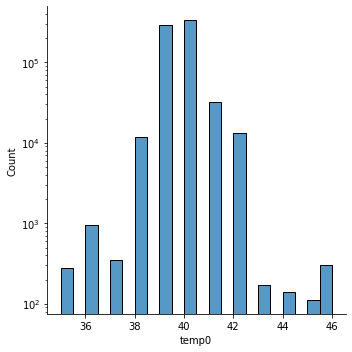

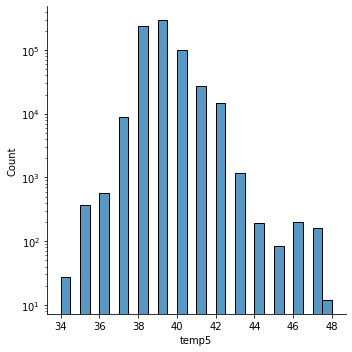

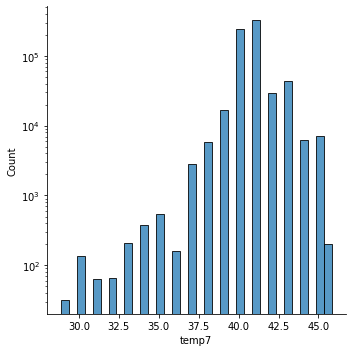

In [15]:
temp_keys=['temp0','temp5','temp7']
[sns.displot(data[t], binwidth=0.5, log=True) for t in temp_keys]

A 10 second mean feels like it will be a useful feature. I will also use the 10 minute mean for my reward function.

In [16]:
#pandarellel repeatably fails with these variable sized agg windows :(
for i in range(0,10):
    data['temp'+str(i)+'_10s_mean'] = data.rolling('10s')['temp'+str(i)].mean()
    #data['temp'+str(i)+'_10s_mean'] = data.rolling('10s')['temp'+str(i)].parallel_apply(np.mean,raw=True)

In [17]:
for i in range(0,10):
    data['temp'+str(i)+'_10m_mean'] = data.rolling('600s')['temp'+str(i)].mean()
    #data['temp'+str(i)+'_10m_mean'] = data.rolling('600s')['temp'+str(i)].parallel_apply(np.mean,raw=True)

In [18]:
mhz_keys = ["cpu_mhz" + str(i) for i in range(0,8)]
temp_keys = ["temp" + str(i) + "_10m_mean" for i in range(0,10)]
def reward_function(row):
    global mhz_keys
    global temp_keys
    # if we've gotten permathrottled that's bad
    for k in mhz_keys:
        if row[k] <= 401.0:
            return -100
    # if any temp has been above 49.5C for 10 minutes that's bad
    for k in temp_keys:
        if row[k] > 49.5:
            return -50
    # if fan speed, reward for low speed and penalize for high speed
    speed = row["fan_speed"]
    if speed < 3000:
        if speed < 2700:
            return 50
        else:
            return 10
    else:
        if speed > 3500:
            return -10
        else:
            return -1
    return -200 # This should never happen and indicates something is wrong

In [19]:
data['reward'] = data.parallel_apply(reward_function, axis=1)

Lets see if these labels are somewhat reasonable

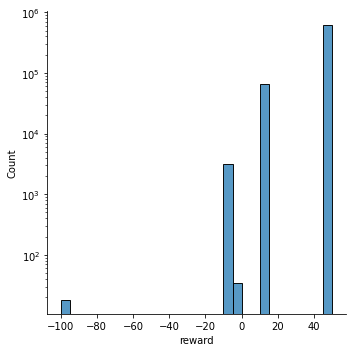

In [20]:
g = sns.displot(data['reward'], binwidth=5, log=True)

These are our idle, nice, user, and sys stats (int that alphabetical order).
As expected we spend most of our time in idle

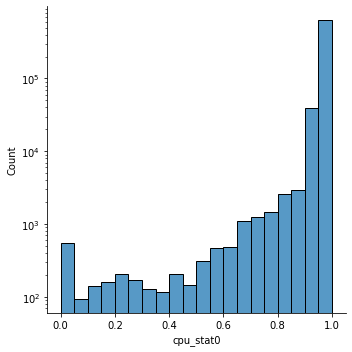

In [21]:
sns.displot(data.cpu_stat0, binwidth=0.05, log=True)

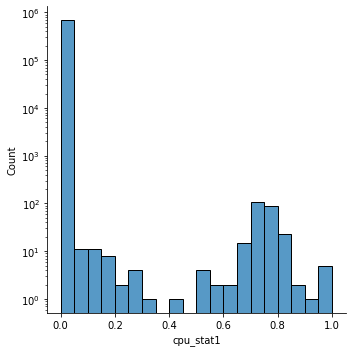

In [22]:
sns.displot(data.cpu_stat1, binwidth=0.05, log=True)

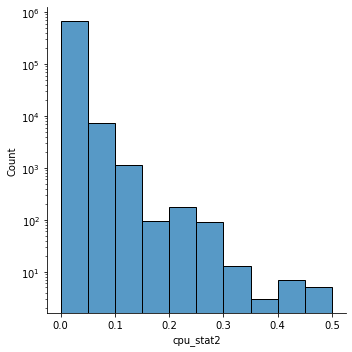

In [23]:
sns.displot(data.cpu_stat2, binwidth=0.05, log=True)

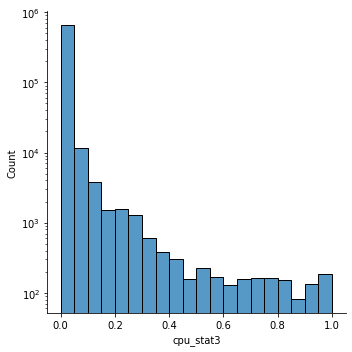

In [24]:
sns.displot(data.cpu_stat3, binwidth=0.05, log=True)

Looking at our CPU frequency we spend most of our time at 2.8Ghz, while dipping down to a range of lower frequencies when under load. We're in fact jumping into some fixed frequencies but the value we pull from the system is already doing some averaging.

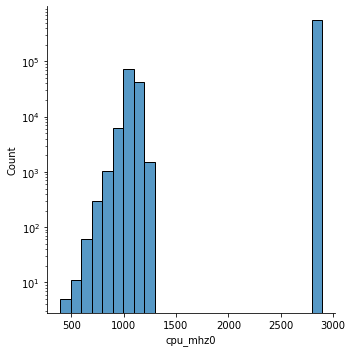

In [25]:
sns.displot(data.cpu_mhz0, binwidth=100, log=True)

## Ok, so lets do something with this data..

What is the total reward using the heuristic?

In [27]:
reward = data.parallel_apply(reward_function, axis=1)

reward.sum()

31245495

Let's create a simple linear model that optimizes for next minute reward. Looking at the weights should give us a good idea of feature importance. Then we can build a LSTM to add a bit of memory. The main challenge will be that our input sample is highly unbalanced since the computer spent most of it's time in idle.

Using the fast.ai library or just pyTorch would probably be fastest. But I'm going to use Keras on Tensorflow since that is closer to the standard tooling at Spotify.

In [54]:
# lets start by labeling the data with a bit of future reward,
# I 60s is about 470 samples.. the shift makes this 60s right
# window roughly equivalent to a 60s left window.
# I'm not going to worry about the 470 'bad samples' for now.
data['linear_label'] = data.rolling('60s')['reward'].mean().shift(periods=-470, fill_value=0)

In [43]:
data['linear_label']

dt
2021-07-02 18:12:32.119635    10.217391
2021-07-02 18:12:32.279333    10.216802
2021-07-02 18:12:32.438482    10.216802
2021-07-02 18:12:32.597555    10.216802
2021-07-02 18:12:32.757193    10.216802
                                ...    
2021-07-04 13:14:14.406338     0.000000
2021-07-04 13:14:14.567028     0.000000
2021-07-04 13:14:14.726387     0.000000
2021-07-04 13:14:14.886328     0.000000
2021-07-04 13:14:15.055814     0.000000
Name: linear_label, Length: 680862, dtype: float64